# 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．


In [1]:
!cat neko.txt |mecab > neko.txt.mecab
!head neko.txt.mecab


一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
　	記号,空白,*,*,*,*,　,　,　
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。


In [2]:
# from collections import defaultdict
# dic = defaultdict(lambda: defaultdict(lambda:defaultdict(lambda:defaultdict(int))))
neko_list = []
tmp = []
with open("neko.txt.mecab","r") as f:
    for line in f.readlines():
        line = line.strip('\n')
        if line != "EOS":
            if len(line.split(',')) == 7:
                # print(line)
                surface,keys  = line.split('\t')
                pos,pos1,pos2,pos3,_,_,_ = keys.split(',')
                dic = dict(zip(("surface","base","pos","pos1"),(surface,surface,pos,pos1)))
                # dic = dict(zip(("surface","base","pos","pos1"),(surface,base,pos,pos1)) for pos,pos1,pos2,pos3,_,_,_ in [keys.split(',')])
            else:
                surface,keys  = line.split('\t')
                # if len(keys.split(',')) != 9:
                # print(keys.split(','))
                # dic = dict(zip(("surface","base","pos","pos1"),(surface,base,pos,pos1)) for pos,pos1,pos2,pos3,_,_,base,yomi,hatuon in [keys.split(',')])
                # print(list(zip(("surface","base","pos","pos1"),(surface,base,pos,pos1)) for pos,pos1,pos2,pos3,_,_,base,yomi,hatuon in [keys.split(',')]))
                pos,pos1,pos2,pos3,_,_,base,yomi,hatuon = keys.split(',')
                dic = dict(zip(("surface","base","pos","pos1"),(surface,base,pos,pos1)))
            tmp.append(dic)
        else:
            neko_list.append(tmp)
            tmp = []


In [3]:
for i in range(len(neko_list)):
    print(neko_list[i])

詞', 'pos1': '自立'}, {'surface': 'ながら', 'base': 'ながら', 'pos': '助詞', 'pos1': '接続助詞'}, {'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}, {'surface': 'こう', 'base': 'こう', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '考え', 'base': '考える', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'た', 'base': 'た', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': 'こんな', 'base': 'こんな', 'pos': '連体詞', 'pos1': '*'}, {'surface': '呵責', 'base': '呵責', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'に', 'base': 'に', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '逢う', 'base': '逢う', 'pos': '動詞', 'pos1': '自立'}, {'surface': 'の', 'base': 'の', 'pos': '名詞', 'pos1': '非自立'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'つまり', 'base': 'つまり', 'pos': '接続詞', 'pos1': '*'}, {'surface': '甕', 'base': '甕', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'から', 'base': 'から', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '上', 'base': '上', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'へ', 'ba

# 31. 動詞
動詞の表層形をすべて抽出せよ．

In [4]:
verb_surface = set()
for line in neko_list:
    for word in line:
        if word.get("pos") == "動詞":
            verb_surface.add(word.get("surface"))
print(verb_surface)

', '舐める', '懸っ', '癒す', 'いいかえ', '吹き付け', '惚れ込ん', '売り捌い', '描き出さ', '照り付け', '嘯い', '陣取っ', '出せ', '籠っ', '端折り', '貼っ', 'しめん', '図ら', '叶わ', '引き', 'ぬい', 'ねむり', '択ば', 'うなら', 'あてがえ', '担ぎ', '渡る', '促し', '代り', '浮かれ', 'もがい', 'うたい', '拵え', 'たたる', 'なさっ', '遊ぶ', '決し', '下っ', '致そ', '有し', '綻び', 'ぱくつく', 'だし', '落とし', '与っ', '驚きゃ', '移ら', '盗む', '迎えれ', '逢う', '致す', '下がろ', '償わ', '傾け', '潜り', '突き', '乞う', '困っ', '見上げ', '惚れる', '慕っ', '活け', 'いがみ合い', '亡くなり', '進む', '気が付き', '取り扱っ', 'たまっ', '気がつか', '掛れ', '寝る', 'かたどっ', '採る', 'きき', '付い', '通り抜ける', 'やって来', '謡わ', '泣かし', '解し', '説き', '威張っ', '吟じ', 'つけ込ん', '這入', 'あこがれ', '炊き', 'なら', '果さ', '絞め', '食わし', '調子づい', '入り込み', '読み直し', '弁じ', 'ふて', '寄ら', '居り', '儲ける', '記し', '込ま', 'かう', '見計らっ', '気がつく', '結い', '下ろし', '引きずり', '信ずる', '間に合っ', '刺し通し', 'し', '呼びつけ', '綴る', '張り付け', 'いそが', 'ゆい', '画い', '書き', '入れ違い', '損ね', 'ゆす', '登っ', '掻ける', '食える', '向き直っ', '燃える', '唱え', 'あやまっ', 'あり', '隔て', '崩れ', '弾きゃ', '引込ん', '酔っ払っ', '抛', '卸す', 'しむ', '引っ繰り返し', '開く', '洩る', 'やり直す', '見つかれ', '命じ', '已めろ', '拱い', '叩き込み', '騒い', '乗りゃ', 'たてる', '復

# 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [17]:
verb_base = set()
for line in neko_list:
    for word in line:
        if word.get("pos") == "動詞":
            verb_base.add(word.get("base"))
print(verb_base)

{'卸す', '有る', 'かこつ', '食わす', '図抜ける', '解す', 'なる', 'ふれる', '消え失せる', '外れる', '労する', 'たる', 'ざれる', '見かねる', '陥る', '思い付く', '叩きつける', 'いがみ合う', '燃える', 'いやがる', '漂う', '視る', 'はち切れる', '寄こす', '飛び離れる', '蹴返す', '感じ入る', '掛ける', 'まがる', '纏まる', '取りとめる', '蹴る', '鳴らす', 'いらっしゃる', '控える', '惚れる', 'ひっくり返す', 'せめる', '後れる', 'もったいぶる', 'つかえる', '劃する', '差しかかる', '遣る', '降る', '害す', '譲る', '吊る', 'たくる', '舂く', '彩る', '指す', 'たてる', '明け放つ', '思える', '諦める', '結び付ける', '片付ける', '連れ出す', '過ごす', '切らす', '見る', '考え付く', 'やる', '踊る', '削り取る', '蒔く', '飛び下りる', '重ねる', '生きる', '授ける', 'くれる', '切り抜く', 'つとめる', '混ぜる', 'なぐりつける', '除く', 'うる', '覚ます', 'ぐれる', '縮める', 'すう', '離れる', '開ける', 'やられる', '砕く', '延びる', 'すます', '伸す', '腐れる', 'なす', '講ずる', 'あばく', 'すくう', '立ち至る', '吹き付ける', '見上げる', '並べ立てる', 'たのむ', '貫く', '促す', 'しきる', '跳ね返す', '振り翳す', '暴く', 'ふざける', 'はりつける', '引く', '睨み合う', '笑う', 'こしらえる', 'ころばす', '漏る', '壊す', '這う', '垂らす', '張り込む', '注ぐ', '行き詰る', '挙げる', 'おどる', '取り合う', '売り捌く', 'せる', 'よこす', '持て余す', '怠る', 'くだる', 'くむ', '挟む', '交ぜる', '貪る', 'あらす', '着こなす', 'かむ', '横切る', '支える', 'あてこする', '取り払う', 

# 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [18]:
noun_pos1 = set()
for line in neko_list:
    for word in line:
        if word.get("pos") == "名詞" and word.get("pos1") == "サ変接続":
            noun_pos1.add(word.get("base"))
                
print(noun_pos1)

{'衰退', '面晤', '頓挫', '激', '萌芽', '販売', '出頭', '慰撫', '北面', '再考', 'ろか', '鼓吹', '称', '立見', '歩行', '主張', '自炊', 'へ', '著述', '交際', '罵倒', '逆戻り', '発揮', '出立', 'が', '自認', '新調', '分与', 'ね', '解', '予言', '披露', '継続', '養成', '困窮', '見る', '自任', '釘付け', '避暑', '復興', '虐待', '因', '治療', '繁昌', '尽力', '我慢', '呈', '独立', '向上', '蒸発', '興奮', 'なんて', '完成', '笑う', '他言', '察し', '伏', '告訴', '制定', '形容', '拡張', '君', '組織', '修行', '防禦', '有', '安心', '乾燥', '計画', '少し', '震動', '分', '落着', '連署', '運転', '献上', '遊弋', '読誦', '買収', '沙汰', '自乗', '喜悦', '勤務', '料理', '彷徨', 'そうして', '怒号', '吃驚', '贋造', 'を', '暴露', '達観', '暗合', '開拓', '敬遠', '胚胎', '執着', 'あかんべえ', '談判', '想像', 'にこにこ', '嘆賞', '混同', 'てる', '保護', '叙述', '努力', '窺知', '逗留', '増加', '寸断', '来着', '一目', '口論', '諒', '老衰', 'り', '登校', '仲間入り', '左右', '診断', '混雑', '注意', '賛成', '黙読', '属', '尋問', '悪戯', '批評', '薨去', '案出', '結婚', '圧倒', '背面', '怪我', '借金', '列挙', '撰', '克復', '伝染', '表明', '溷濁', '列席', '隆起', '動揺', '弁じる', '算', '際会', '処理', '勧誘', '故障', '清浄', '御礼', '起居', '予期', '突起', '蓄積', '写生', '質問', '比例', '退却', '雑談', '鼓舞', '別居', '恕', '服膺', '同意', '大発

# 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [19]:
AnoB_list = set()
for line in neko_list:
    for i in range(1,len(line)-1):
        if line[i].get("surface") == "の" and line[i-1].get("pos") == "名詞" and line[i+1].get("pos") == "名詞":
            AnoB = line[i-1].get("surface")+line[i].get("surface")+line[i+1].get("surface")
            AnoB_list.add(AnoB)

print(AnoB_list)

年', '吐月峰の印', '活気の使い道', '松の木の皮', 'バスの温泉', '寝巻の襟', 'ほかの病気', '寝室の障子', '臘の婦人', 'うちのもの', '亡国の音', '方の観察', '彼の足', '右の端', '僕の前', '迷亭の学理', '立ての白', 'さんの前', '先生の演説', '陰の喩', '木の枝', '山芋の夢', '心配の合併', '本来の面目', '無名の猫', '昨日の権幕', '名前のドクトル', '事のよう', '北側の空地', '顔の中央', 'おさんの隙', '護の恐れ', '心の底', '障子の前', '老の当時', '適当の抵抗', '淑女の品性', 'こいつの方', '博士の姪', '談話の火の手', '吾輩の口', '珊の弾丸', '紙幣の娘', '木像のよう', '顔の道具', '自分の妻', '世界の一', 'かたのよう', '君のヴァイオリン', '浮世の風', '頭の試験', '当家の令嬢', '笹の上', '得意のもの', '皮のあたり', '彼等の社会', '時代の遺物', '掌の上', '陥落の号外', '代言の主人', '蕪村の春風', '盛徳の君子', '主人の前', '居士の事', '左の方', '軒のうち', '銀製の吾輩', 'バケツの中', '椎茸の傘', '書物の上', '自己の利益', '左の耳', '玄関の障子', '迷亭の専断', '廓清の功', '作りの博士', '棒の看板', '養子の代', '人の意志', '人間の行為', '尻尾の先', '下女の声', '本の毛', '山下の雁', '微塵の責任', '私の国', '心の裡', '鵜の沼', '人間の歴史', '表の窮措大', '先生の居', '蒙昧の世界', 'Agnodiceの世話', '松の木越', '人類の生息', '同等の熱度', '小指の半ば', '主人の事', 'コメディーの神様', '河豚の提灯', '流の学問', '橋の上', '無名氏の作', '猫の頭', '内の鼠', '日本の人間', '化物の域', '顔面の構造', '君の何とか', '心の落着', '欄干の上', '先刻の不平', '書生の顔', 'シーザーのそれ', 'ご存じの越智', '彼の唱道', '坂の団子', '女の事', '窟の主

# 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [20]:
noun_phrase_list = set()
for line in neko_list:
    noun_phrase = ""
    for i in range(len(line)):
        if line[i].get("pos") == "名詞":
            noun_phrase += line[i].get("surface")
        else:
            if noun_phrase != '':
                noun_phrase_list.add(noun_phrase)
                noun_phrase = ""

print(noun_phrase_list)

, '地', '言草', '軍百万人', '一夜作り', '傾城', '待ち', '金田富子嬢', '形式的', '血脈', '否大', '慢', '平面', '犬殺し', '土中', 'そればってん', '風通し', 'からだ', '予算', 'ざる化装道具', '徘徊', '一人同窓中', '傍若無人', '万全', '楽器', '危機一髪', '公等', '美学者迷亭先生', 'リチャード', 'どなた', '山盛り', '午後二時頃', '小舟', '客人', '道楽', '私しゃ', '談', '全能', '台湾', '眼鏡', '千疋', '拝借', '生涯三鞭酒', '勢力', '会合', '仰天', '土地柄', '伝', '活版', 'みんな高価', '四海天下', '行徳', '何里', '多々良三平', '賢哲', '元来不明瞭', '名残り', '何冊', '茫々', 'ラッセル', '古今来', '通り一文', '悟り', '本当', '挙行', '近所迷惑', '毛筆', '暗黒', '鐘', '似合い', '将', '水車', 'かご', '縄ぐるみ', '旦那様', '十二三年以前', '一世', '体操', '周囲附近', '際こと', '公園', '高山彦九郎', '百年目', '五年', 'クリシッパス', '理想', 'むかしハンニバル', '十年一日', '脛', '一大発見', '冬', '弁難攻撃', '山伏町', '右', '一つ二つ', 'や', '漢土', '欠勤届', '推察願上候', '観察点', '四十六目', '根拠地', '進化', '満腔', '喝', '付け髯', '毎日毎日珠', '庸人', '咎め立て', '陽性', '春夏秋冬一枚看板', '空', '浜田', '野蛮人', '勇気', '美術学校', 'かかり', '茶人的猫', '大平', '台所', '毎日毎日御苦労', '切れ', '癇癪玉', '着たて', '仕合せ', '薬味', '功徳', '去年', '切身', '絞首架', '内材料', '朝っぱら', '二十七日', '竈', '——元禄', '以', '——」「', '坊ば', '限り吾輩', '一つ', 'なに猫', '引力上', '扇使い', '土俵際', '古井武右衛門

# 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [6]:
from collections import Counter

word_cnt = []
for line in neko_list:
    word_cnt +=[l.get("base") for l in line]
word_cnt = Counter(word_cnt)
# for word, cnt in word_cnt.most_common():
#     print(word, cnt)
word_cnt.most_common()

[('の', 9194),
 ('。', 7486),
 ('て', 6848),
 ('、', 6772),
 ('は', 6420),
 ('に', 6243),
 ('を', 6071),
 ('だ', 5975),
 ('と', 5508),
 ('が', 5337),
 ('た', 4267),
 ('する', 3657),
 ('「', 3231),
 ('」', 3225),
 ('ない', 3052),
 ('も', 2479),
 ('ある', 2320),
 ('で', 2081),
 ('から', 2031),
 ('いる', 1777),
 ('ん', 1568),
 ('か', 1529),
 ('云う', 1408),
 ('事', 1207),
 ('です', 1164),
 ('ます', 1146),
 ('なる', 1120),
 ('へ', 1034),
 ('う', 987),
 ('もの', 981),
 ('君', 973),
 ('主人', 932),
 ('ぬ', 719),
 ('よう', 696),
 ('見る', 675),
 ('ね', 657),
 ('この', 649),
 ('御', 636),
 ('ば', 617),
 ('人', 602),
 ('その', 576),
 ('一', 554),
 ('そう', 546),
 ('何', 539),
 ('思う', 502),
 ('よ', 502),
 ('吾輩', 481),
 ('来る', 460),
 ('れる', 450),
 ('じゃ', 450),
 ('…', 433),
 ('これ', 414),
 ('\u3000', 411),
 ('さ', 410),
 ('それ', 381),
 ('聞く', 347),
 ('でも', 346),
 ('時', 345),
 ('迷亭', 343),
 ('行く', 340),
 ('出来る', 324),
 ('三', 319),
 ('——', 319),
 ('出る', 317),
 ('な', 317),
 ('まで', 313),
 ('ところ', 313),
 ('方', 312),
 ('やる', 311),
 ('二', 303),
 ('上', 294),
 ('いい', 2

# 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

[('の', 9194), ('。', 7486), ('て', 6848), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5975), ('と', 5508), ('が', 5337)]


<BarContainer object of 10 artists>

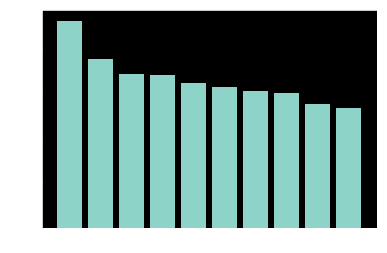

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
top10 = word_cnt.most_common()[:10]
print(top10)
word, cnt = zip(*top10)
plt.rcParams['font.family'] = 'APPLEGothic'
plt.bar(word,cnt)
# plt.bar(word,cnt)

# 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

(array([1.1915e+04, 1.3000e+01, 4.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.2030e+02, 1.8396e+03, 2.7589e+03, 3.6782e+03,
        4.5975e+03, 5.5168e+03, 6.4361e+03, 7.3554e+03, 8.2747e+03,
        9.1940e+03]),
 <a list of 10 Patch objects>)

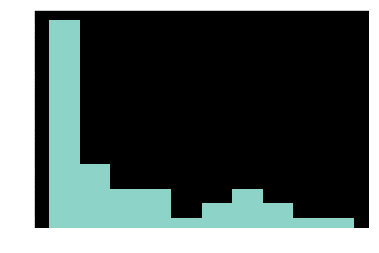

In [24]:
# print(list(zip(*word_cnt.most_common())))
# plt.hist(list(zip(*Counter(list(zip(*word_cnt.most_common()))[1]).most_common())),)

plt.hist(list(zip(*word_cnt.most_common()))[1],log=True)


# 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

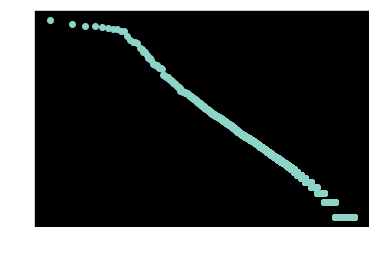

In [30]:
# Counter(list(zip(*word_cnt.most_common()))[1]).most_common()
y = list(zip(*word_cnt.most_common()))[1]
x = list(range(1,len(y)+1))
plt.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.show()